## Loading Data

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('weather.csv')
df['encoded_city'] = pd.factorize(df['city'])[0]
df

,city,lat,lon,month,monthnum,sunshine,rain,encoded_city
0,San Diego,32.715736,-117.161087,Jan,1,217,1.53,0
1,San Diego,32.715736,-117.161087,Feb,2,255,0.15,0
2,San Diego,32.715736,-117.161087,Mar,3,234,0.57,0
3,San Diego,32.715736,-117.161087,Apr,4,236,1.01,0
4,San Diego,32.715736,-117.161087,May,5,277,0.02,0
...,...,...,...,...,...,...,...,...
67,Miami,25.761681,-80.191788,Aug,8,263,8.88,5
68,Miami,25.761681,-80.191788,Sep,9,216,9.86,5
69,Miami,25.761681,-80.191788,Oct,10,215,6.33,5
70,Miami,25.761681,-80.191788,Nov,11,212,3.27,5


## Plot #1: Month vs Sunshine Across Cities

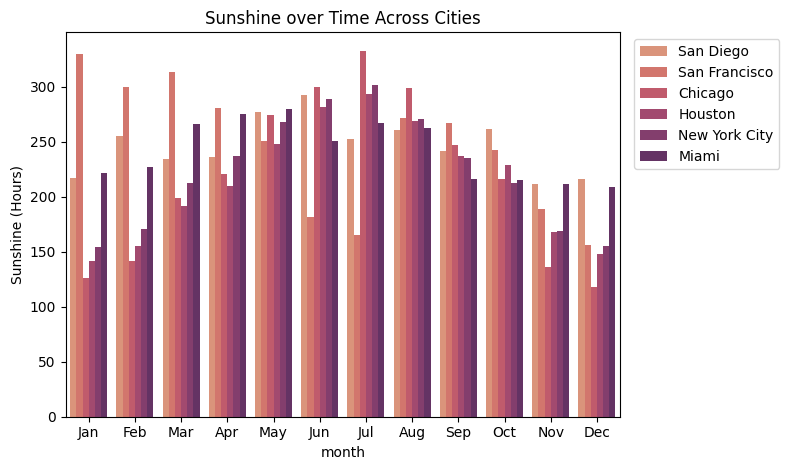

In [56]:
sns.barplot(data=df, x='month', y='sunshine', hue='city', palette='flare')
plt.title('Sunshine over Time Across Cities')
plt.ylabel('Sunshine (Hours)') 
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right')

## Plot 2: Month vs Rain Across Cities

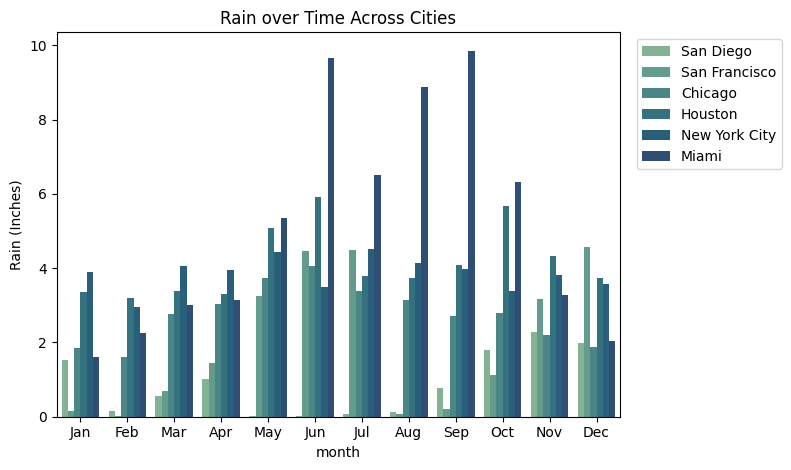

In [57]:
sns.barplot(data=df, x='month', y='rain', hue='city', palette='crest')
plt.title('Rain over Time Across Cities')
plt.ylabel('Rain (Inches)')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right')

## Plot 3: Sunshine vs Rain Across Cities

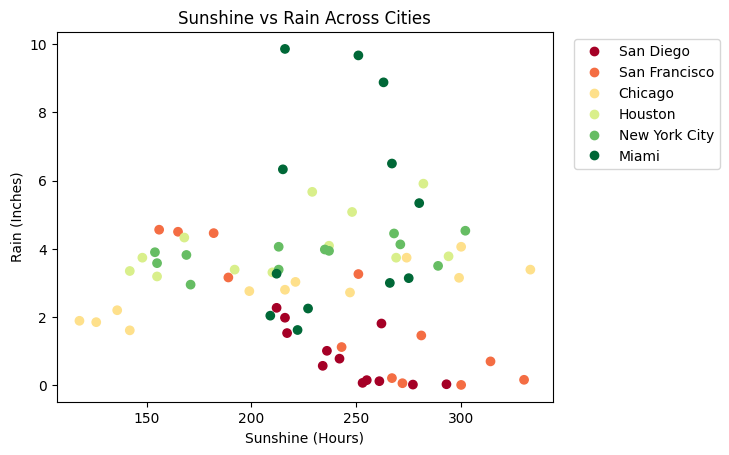

In [62]:
p3 = plt.scatter(df['sunshine'], df['rain'], c = df['encoded_city'], cmap = 'RdYlGn')
plt.legend(handles=p3.legend_elements()[0], labels=['San Diego', 'San Francisco', 'Chicago', 'Houston', 'New York City', 'Miami'], bbox_to_anchor=(1.35, 1), loc='upper right')
plt.title('Sunshine vs Rain Across Cities') 
plt.xlabel('Sunshine (Hours)') 
plt.ylabel('Rain (Inches)')
plt.show()

## Plot Preference

Out of these plots, I prefer Plot #3: Sunshine vs Rain Across Cities the most. This is because it displays both sunshine and rain levels in a visually digestible way while across cleanly separating data points based off the city. However, one improvement I would like to make to the visualization is replacing the current color legend with colors that accurately represent each city's climate and temperament. For actual analysis, I want to try searching for external data on the citizens' temperament in each month/city and incorporate that into the previous visualization. But, with my current rough plot, I can already notice clear differences across cities for their weather.